[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//TransmissionLines/blob/master/Smith.ipynb)


# Carta de Smith
Se presentan el código para trabajar con la Carta de Smith empleando Python.

Por:

Ferney Amaya Fernández https://ferneyoamaya.github.io/

Cuando se grafica una impedancia en la Carta de Smith, a la impedancia: <br>
$$\Large z = (z_{real} + z_{imaginario})/Z_0$$
<br>
 se le realiza la Transformación Bilineal de Moebius normalizada:<br>
$$\large \Gamma = (z-1)/(z+1)$$
<br>
La transformación bilineal de Moebius normalizada inversa está dada por la ecuación: <br>
$$\Large z = (1 + \Gamma)/(1-\Gamma)$$
<br>
A continuación se presenta el código para graficar algunas líneas en la Carta de Smith.

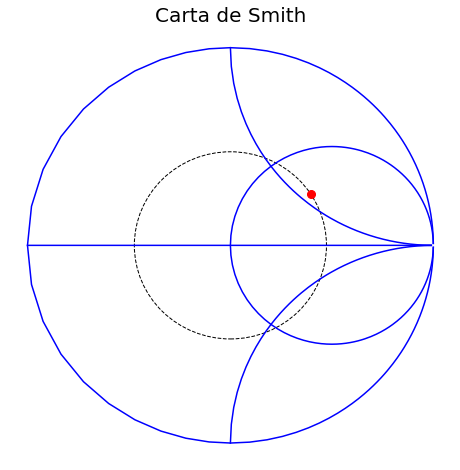

In [ ]:
#@title Parámetros de entrada
import numpy as np
import matplotlib.pyplot as plt

ZL_real =   180#@param {type: "number"}
ZL_imag =   120#@param {type: "number"}
Z0 = 100  #@param {type: "number"}

#Realiza la transformación bilineal de Moebius normalizada
#Gamma = (z-1)/(z+1)
def TBM(x,y):
  x = np.array(x)
  y = np.array(y)
  z = x + y*1j
  T = (z-1)/(z+1)
  xT = np.real(T).tolist()
  xT = np.real(T)
  yT = np.imag(T).tolist()
  yT = np.imag(T)
  return xT, yT
    
#Realiza la transformación bilineal de Moebius normalizada inversa
#z = (1+Gamma)/(1-Gamma)
def ITBM(xT,yT):
  xT = np.array(xT)
  yT = np.array(yT)
  T = xT + yT*1j
  z = (1+T)/(1-T)
  x = np.real(z).tolist()
  y = np.imag(z).tolist()
  return x, y  

Lm = 200 #
step = 0.1

fig, ax = plt.subplots(figsize=(8,8))
#Add graph points
#x=0
gyt = np.arange(-Lm,Lm+step,step)
gxT, gyT = TBM(gyt*0,gyt)
ax.plot(gxT, gyT,'b')
#x=1
gxT, gyT = TBM(gyt*0+1,gyt)
ax.plot(gxT, gyT,'b')
#y=0       
gxt = np.arange(0,Lm+step,step)
gxT, gyT = TBM(gxt,gxt*0)
ax.plot(gxT, gyT,'b')
#y=1
gxT, gyT = TBM(gxt,gxt*0+1)
ax.plot(gxT, gyT,'b')
#y=-1
gxT, gyT = TBM(gxt,gxt*0-1)
ax.plot(gxT, gyT,'b')

#Add the point
gxT, gyT = TBM(ZL_real/Z0, ZL_imag/Z0)
ax.plot(gxT,gyT,'or',markersize=8)

#Graph the circle
La = np.sqrt(gxT**2 + gyT**2)
cir = plt.Circle((0, 0), La, ls='--', fill=False)
ax.add_artist(cir)
ax.set_title('Carta de Smith', fontsize=20)
ax.set_axis_off()
